Dataset Info:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Shape: (200, 5)

Column Names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Using features: Annual Income (k$) and Spending Score (1-100)


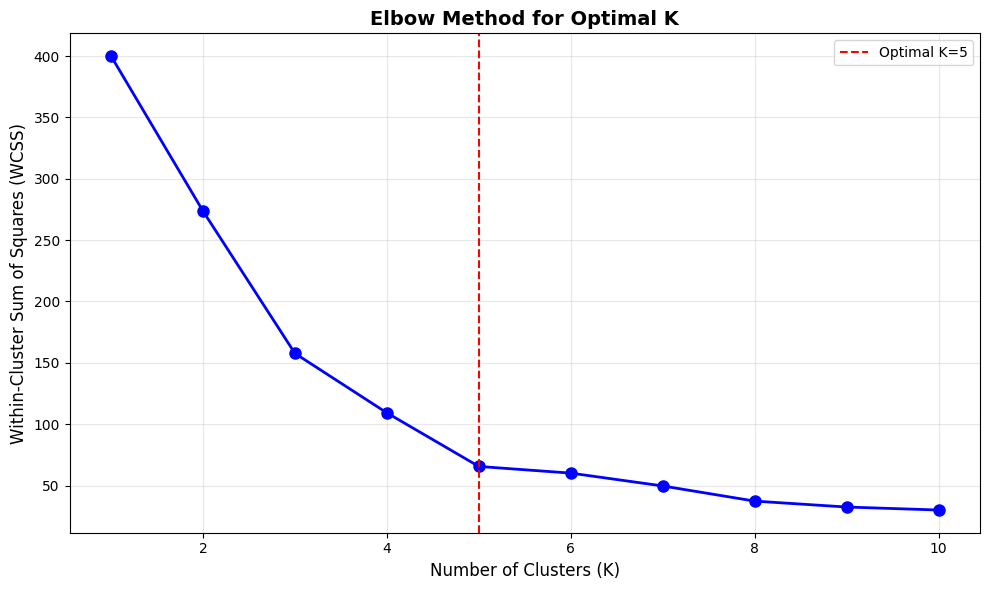

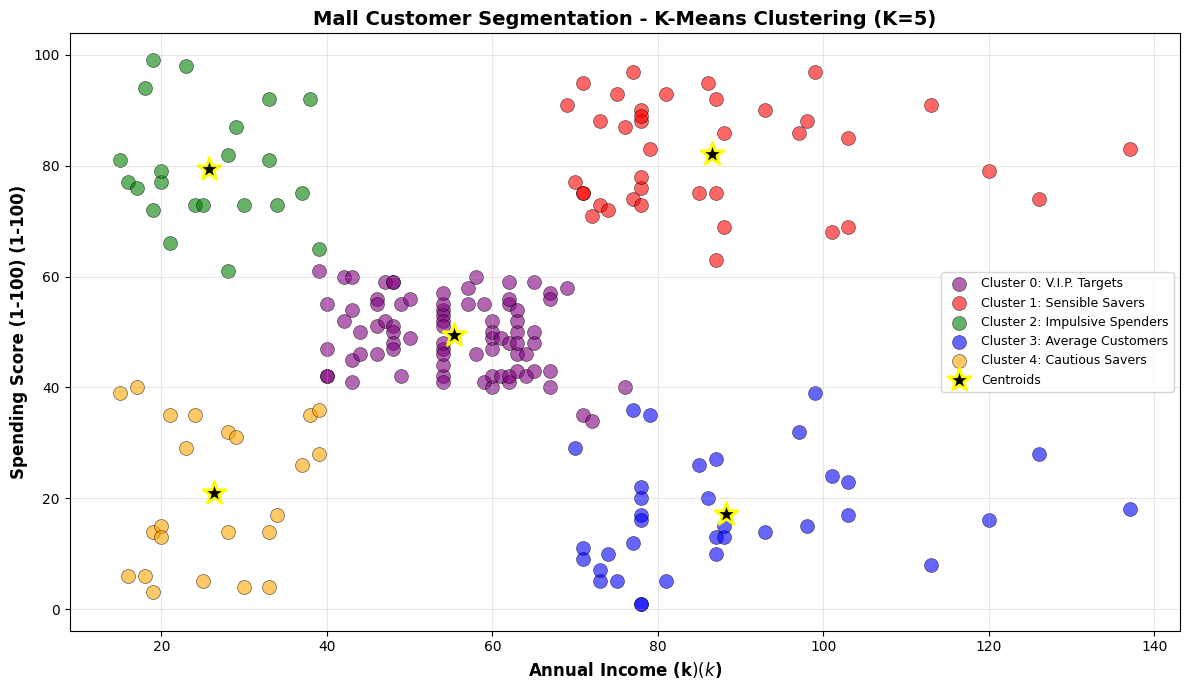


CLUSTER ANALYSIS

V.I.P. Targets (Cluster 0):
  Count: 81 customers
  Avg Annual Income (k$): $55.30k
  Avg Spending Score (1-100): 49.52
  Income Range: $39k - $76k
  Spending Range: 34 - 61

Sensible Savers (Cluster 1):
  Count: 39 customers
  Avg Annual Income (k$): $86.54k
  Avg Spending Score (1-100): 82.13
  Income Range: $69k - $137k
  Spending Range: 63 - 97

Impulsive Spenders (Cluster 2):
  Count: 22 customers
  Avg Annual Income (k$): $25.73k
  Avg Spending Score (1-100): 79.36
  Income Range: $15k - $39k
  Spending Range: 61 - 99

Average Customers (Cluster 3):
  Count: 35 customers
  Avg Annual Income (k$): $88.20k
  Avg Spending Score (1-100): 17.11
  Income Range: $70k - $137k
  Spending Range: 1 - 39

Cautious Savers (Cluster 4):
  Count: 23 customers
  Avg Annual Income (k$): $26.30k
  Avg Spending Score (1-100): 20.91
  Income Range: $15k - $39k
  Spending Range: 3 - 40

MARKETING STRATEGY RECOMMENDATIONS

V.I.P. Targets: Retain with exclusive experiences and loyalty

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Update this path to match your file location
df = pd.read_csv(r"D:\SEM 5\ML\Mall_Customers.csv")

# Display basic information
print("Dataset Info:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Select features for clustering (Annual Income and Spending Score)
# Adjust column names based on your CSV (common variations handled)
income_col = [col for col in df.columns if 'income' in col.lower()][0]
spending_col = [col for col in df.columns if 'spending' in col.lower() or 'score' in col.lower()][0]

X = df[[income_col, spending_col]].values
print(f"\nUsing features: {income_col} and {spending_col}")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== ELBOW METHOD =====
# Calculate WCSS for different values of K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='r', linestyle='--', label='Optimal K=5')
plt.legend()
plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== K-MEANS CLUSTERING WITH K=5 =====
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# ===== VISUALIZATION =====
plt.figure(figsize=(12, 7))

# Define colors for clusters (matching report: Purple, Red, Green, Blue, Orange)
colors = ['purple', 'red', 'green', 'blue', 'orange']
cluster_names = ['V.I.P. Targets', 'Sensible Savers', 'Impulsive Spenders', 
                 'Average Customers', 'Cautious Savers']

# Plot each cluster
for i in range(optimal_k):
    cluster_data = X[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                c=colors[i], label=f'Cluster {i}: {cluster_names[i]}',
                s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', s=300, marker='*', 
            label='Centroids', edgecolors='yellow', linewidth=2)

plt.xlabel(f'{income_col} (k$)', fontsize=12, fontweight='bold')
plt.ylabel(f'{spending_col} (1-100)', fontsize=12, fontweight='bold')
plt.title('Mall Customer Segmentation - K-Means Clustering (K=5)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('customer_segments.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== CLUSTER ANALYSIS =====
print("\n" + "="*60)
print("CLUSTER ANALYSIS")
print("="*60)

for i in range(optimal_k):
    cluster_subset = df[df['Cluster'] == i]
    print(f"\n{cluster_names[i]} (Cluster {i}):")
    print(f"  Count: {len(cluster_subset)} customers")
    print(f"  Avg {income_col}: ${cluster_subset[income_col].mean():.2f}k")
    print(f"  Avg {spending_col}: {cluster_subset[spending_col].mean():.2f}")
    print(f"  Income Range: ${cluster_subset[income_col].min():.0f}k - ${cluster_subset[income_col].max():.0f}k")
    print(f"  Spending Range: {cluster_subset[spending_col].min():.0f} - {cluster_subset[spending_col].max():.0f}")

# ===== MARKETING RECOMMENDATIONS =====
print("\n" + "="*60)
print("MARKETING STRATEGY RECOMMENDATIONS")
print("="*60)

strategies = [
    "Retain with exclusive experiences and loyalty perks",
    "Convert with personalized, high-value promotions",
    "Encourage with flexible financing and bulk discounts",
    "Upsell with standard promotions and premium products",
    "Minimal effort; focus resources on higher-value groups"
]

for i in range(optimal_k):
    print(f"\n{cluster_names[i]}: {strategies[i]}")

# Save clustered data to CSV
df.to_csv('Mall_Customers_Clustered.csv', index=False)
print("\n\nClustered data saved to 'Mall_Customers_Clustered.csv'")
print("Visualizations saved: 'elbow_method.png' and 'customer_segments.png'")